Student Name: Joel Amarou Heuer

Student ID: 202102201

# Imports

In [4]:
import numpy as np
import pandas as pd
import random
import math     

# for tokenization use nltk
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /home/korosu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# (Hyper)Parameters

In [70]:
# TODO Hyperparameters
output_size = 1 # -> number of neurons in output-layer (= for each possible rating?)
learning_rate = 0.01
number_of_epochs = 1 # how is every sample used for pass/forward/backward


# Parameters
train_data_path = "./data/drugLibTrain_raw.tsv" # please use relative path like this
test_data_path = "./data/drugLibTest_raw.tsv" # please use relative path like this

# Main

In [6]:
input_features =  'commentsReview'

###########################################
################ Load Data ################
###########################################
# load data
train_data = pd.read_csv(train_data_path, sep='\t')
test_data = pd.read_csv(test_data_path, sep='\t')
# drop nans
train_data.dropna(subset = [input_features], inplace=True)
test_data.dropna(subset = [input_features], inplace=True)
# lowercase all comments
train_data[input_features] = train_data[input_features].str.lower()
test_data[input_features] = test_data[input_features].str.lower()

In [7]:
############################################################
################ Create directory for words ################
############################################################
# merge data
df_data =  pd.concat([train_data,test_data], axis=0)
# create dictonary
dictonary_words = df_data["commentsReview"].apply(nltk.word_tokenize)
dictonary_words = dictonary_words.values.tolist()
# flat lists
dictonary_words = [item for sublist in dictonary_words for item in sublist]
# drop duplicates
dictonary_words = list(set(dictonary_words))
# number of all words
dict_size = len(dictonary_words)

print(f"Number of words {dict_size}")

Number of words 11584


In [8]:
##############################################
################ Tokenization ################
##############################################
train_data_tokenized:pd.DataFrame = train_data["commentsReview"].apply(nltk.word_tokenize)
test_data_tokenized:pd.DataFrame = test_data["commentsReview"].apply(nltk.word_tokenize)

In [9]:
##############################################################
################ Word Encoding (Bag of words) ################
##############################################################
def to_bow(dataset):
    '''
    @param dataset which should be considered (train or test)
    @return new column for dataset with sentence/word-encoded cells

    For each cell in column of interest, following is performed:
    (1) cell contains sentence
    (2) sentence is tokenized --> produces array of words/tokens
    (3) create array A with len(dict_size) 
    (4) for each token count occurance 
    (5) A[index of token t in dict] = occurance of t
    '''
    new_col = []

    # for each row
    for _, row in dataset.iterrows():
        tokenized = nltk.word_tokenize(row[input_features])
        array = np.zeros(shape=dict_size)

        # for each word in a setence
        for word in tokenized:
            i_hot = dictonary_words.index(word)
            array[i_hot] = array[i_hot] + 1
        new_col.append(array)
    
    return new_col


test_data[input_features] =  to_bow(test_data)
train_data[input_features] =  to_bow(train_data)
train_data.sample(2)

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
2653,2119,renova,7,Considerably Effective,Severe Side Effects,melasma,Faint pigmentation started to disappear after ...,Sever redness and scaling occurred especially ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
618,3602,retin-a,9,Highly Effective,Moderate Side Effects,acne,My acne has completely dminished...i have the ...,"Peeling, dryness, sun sensitivity","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [74]:
#################################################
################ Create datasets ################
#################################################
# split into train & test    and    feature & y columns
train_x = train_data[input_features]
train_y = train_data['rating']
test_x = test_data[input_features]
test_y = test_data['rating']


##################################################################
################ split into validation & training ################
##################################################################
# Split training data into [a] Training (75%) and [b] validation (25%)
valid_x = np.asarray(train_x[int(0.75*len(train_x)):-1])
valid_y = np.asarray(train_y[int(0.75*len(train_y)):-1])
train_x = np.asarray(train_x[0:int(0.75*len(train_x))])
train_y = np.asarray(train_y[0:int(0.75*len(train_y))])


'''WIP'''
# Hyperparamater
num_neurons_in_h1 = 20
num_neurons_in_h2 = 10

w_b = {
    # Input-Layer -> H1
    "L0_w" : np.random.randn(num_neurons_in_h1, dict_size), 
    "L0_b": np.ones((num_neurons_in_h1, 1)) * 0.01,

    # H1 -> H2
    "L1_w" : np.random.randn(num_neurons_in_h2, num_neurons_in_h1), # WIP
    "L1_b": np.ones((num_neurons_in_h2, 1)) * 0.01,

    # H2 -> Output-Layer
    "L2_w" : np.random.randn(output_size, num_neurons_in_h2), # WIP
    "L2_b": np.ones((output_size, 1)) * 0.01,
}


#######################################
################ train ################
#######################################
# TODO
losses= train(train_x, train_y, valid_x, valid_y)

######################################
################ test ################
######################################
# TODO 
#print("Test Scores:")
#print(test(test_x, test_y))

0/2324


/tmp/ipykernel_10223/3682247787.py:12: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


400/2324
800/2324
1200/2324
1600/2324
2000/2324


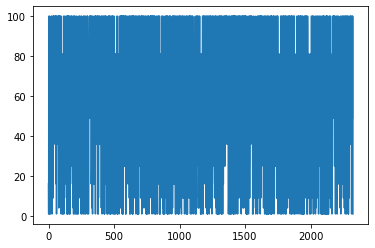

In [75]:
import matplotlib.pyplot as plt

x = range(0,len(losses))
y = losses
plt.plot(x,y)

In [73]:

def derivation_of_loss_function(y_actual, y_pred):
	'''
	calculate squared error
	'''
	return (y_actual-y_pred)**2


def activation_function(z):
	'''
	sigmoid-function is used as activation function for hidden-layers
	'''
	return 1/(1 + np.exp(-z))

def reLU(z):
    '''
	reLU is used as activation for output-layer
	'''
    return np.maximum(0.0, z)

def forward_pass(data):
	# Input --> Hidden-1
	z0 = np.dot(data, w_b['L0_w'].T) + w_b['L0_b'].T
	a0 = activation_function(z0)

	# Hidden-1 --> Hidden-2
	z1 = np.dot(a0, w_b['L1_w'].T) + w_b['L1_b'].T
	a1 = activation_function(z1)


	# LayerHidden2 --> LayerOutput
	z2 = np.dot(a1, w_b['L2_w'].T) + w_b['L2_b'].T
	y_pred = reLU(z2)

	results={
		"a0": a0,
		"a1": a1,
		"y_pred": y_pred[0][0],
	}
	return results

###########################################################

def derivation_of_loss_function(y_actual, y_pred):
	'''calculate squared error'''
	return (y_actual-y_pred)**2


def backward_pass(input_data, forward_results, loss):
	'''calculate error and update weights'''
	
	delta_output = loss
	w_b['L2_w'] -= learning_rate * np.dot(delta_output.T, forward_results['a1']) 
	w_b['L2_b'] -= learning_rate * np.sum(delta_output, keepdims=True)

	delta_z2 = np.dot(delta_output, w_b['L2_w'])
	delta_a1 = delta_z2 * derivation_of_activation_function(forward_results['a1'])
	w_b['L1_w'] -= learning_rate * np.dot(delta_a1.T, forward_results['a0']) 
	w_b['L1_b'] -= learning_rate * np.sum(delta_a1, keepdims=True)

	delta_z1 = np.dot(delta_a1, w_b['L1_w'])
	delta_a0 = delta_z1 * derivation_of_activation_function(forward_results['a0'])


	w_b['L0_w'] -= learning_rate * np.dot(delta_a0.T, np.array([input_data]))
	w_b['L1_b'] -= learning_rate * np.sum(delta_a0, keepdims=True)
	pass


def derivation_of_activation_function(x):
	'''derivation of sigmoid'''
	return activation_function(x) * (1 - activation_function(x))

def loss_function(y_actual, y_pred):
	''' squared error i guess ''' 
	return (y_actual-y_pred)**2



def train(train_data, train_labels, valid_data, valid_labels):
	losses =[]
	for epoch in range(number_of_epochs):
		index = 0

		# Same thing about [hidden_layers] mentioned above is valid here also
		for encoded_sentence, y_rating in zip(train_data, train_labels):
			forward_results = forward_pass(encoded_sentence)
			derivation = derivation_of_loss_function(y_rating, forward_results["y_pred"])
			backward_pass(encoded_sentence , forward_results, derivation)
			loss = loss_function(y_rating, forward_results["y_pred"])
			losses.append(loss)
			
			if index % 400 == 0: # at each 400th sample, we run validation set to see our model's improvements
				print(f"{index}/{len(train_data)}")				
# 				accuracy, loss = test(valid_data, valid_labels)
#				print("Epoch= "+str(epoch)+", Coverage= %"+ str(100*(index/len(train_data))) + ", Accuracy= "+ str(accuracy) + ", Loss= " + str(loss))
#
			index += 1
#
	return losses